In [44]:
import math
from scipy import integrate
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import scipy.io as sio
from glob import glob
import json

In [45]:
%matplotlib inline

In [68]:
x = [10,10,10,10,20,30,40,50,60,60,60]
y = [0,10,20,30,30,30,30,30,40,50,60]

In [70]:
def pathlength(x,y,degree=3)  :
    '''
    x and y arrays must have the same dimensions
    Implements arclength formula to estimate the total length of a fitted spline (cubic default)
    
    Returns: x(t) spline, y(t) spline, path length
    '''
    t = range(len(x)) #time series
    fx = interpolate.UnivariateSpline(t, x, k=degree)
    fy = interpolate.UnivariateSpline(t, y, k=degree)
    print len(x),len(fx(t))
    x_coef = fx.get_coeffs()[~np.isnan(fx.get_coeffs())]
    y_coef = fy.get_coeffs()[~np.isnan(fy.get_coeffs())]
    
    dxdt = fx.derivative()
    dydt = fy.derivative()

    dx_array = [dxdt(xi) for xi in t]
    dy_array = [dydt(yi) for yi in t]

    dx2 = np.square(dx_array)
    dy2 = np.square(dy_array)

    hyp2 = np.add(dx2,dy2)
    integrand = np.sqrt(hyp2)

    length = sum(integrand)

    
    return fx, fy,length 

In [71]:
fns = pathlength(x,y)
print fns[2]

11 11
110.556269126


(0, 70)

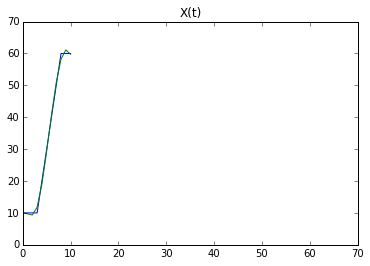

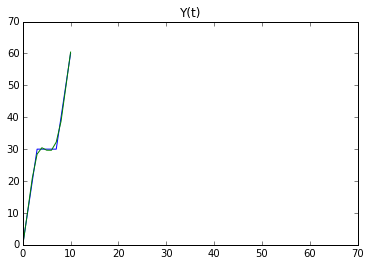

In [75]:
plt.figure()
plt.plot(x)        
plt.plot(fns[0](range(len(x))))
plt.title('X(t)')
plt.xlim(0,max(x)+10)
plt.ylim(0,max(y)+10)

plt.figure()
plt.plot(y)
plt.plot(fns[1](range(len(y))))
plt.title('Y(t)')
plt.xlim(0,max(x)+10)
plt.ylim(0,max(y)+10)
    